In [1]:
from mnist.loader import MNIST
import numpy as np
import random as rand
from pylab import *


In [2]:
def load_mnist_data():
    mnist=MNIST('dataset')
    ##train data
    train_images,train_labels=mnist.load_training()
    train_images=np.asarray(train_images)
    train_labels=np.asarray(train_labels)
    train_labels=train_labels.reshape([train_labels.shape[0],1])
    #print(mnist.display(train_images[5]))
    ##test data
    test_images,test_labels=mnist.load_testing()
    test_images=np.asarray(test_images)
    test_labels=np.asarray(test_labels)
    test_labels=test_labels.reshape([test_labels.shape[0],1])
    return train_images,train_labels,test_images,test_labels


In [3]:
def one_vs_all(k,Y_train):
    Y=[]
    #train
    for i in range(k):
        Y_tr=np.where(Y_train==i,1,0)
        Y.append(Y_tr)
    Y_arr=np.asarray(Y)
    Y_arr=Y_arr.reshape(Y_arr.shape[1],Y_arr.shape[0])
    return Y_arr
    

In [4]:
def max_normalization(X_train,X_test):
    X_train=X_train/255
    X_test=X_test/255
    return X_train,X_test

In [5]:
def initialize_parameters(n,k):
    #theta=np.random.randint(-1,2,size=[n,k])
    #theta=np.random.randn(n,k)*0.01
    theta=np.zeros([n,k])
    return theta

In [6]:
def softmax(z):
    return np.exp(z)/(np.sum(np.exp(z),axis=1,keepdims=True))

In [7]:
def hypothesis(theta, X):
    z=np.dot(X,theta)
    hx =softmax(z) 
    print(hx.shape)
    return hx

In [8]:
def cost(y,hx):
    m=y.shape[0]
    #print(m)
    return -(1/m)*np.sum(y*np.log(hx))

In [9]:
def predict(hx):
    m = hx.shape[0]
    Y_prediction=hx.argmax(axis=1)
    return Y_prediction

In [10]:
def derivative_of_cost(X,hx,y):
    m=y.shape[0]
    d_theeta=(1/m)*(np.dot(X.T,(hx-y)))
    return d_theeta

In [40]:
def confusion_matrix(Y_actual, Y_predicted):
    classes = 10
    Y_actual=Y_actual.reshape(Y_actual.shape[0])
    Y_predicted=Y_predicted.reshape(Y_predicted.shape[0])
    confusion_mtx=np.bincount(Y_actual * classes + Y_predicted).reshape((classes, classes))
    return confusion_mtx

In [12]:
def model(alpha,X_train,Y_train,X_test,Y_test,iterations):
    m=Y_train.shape[0]
    k=10
    costs=[]
    Y_train=one_vs_all(k,Y_train)
    theta=initialize_parameters(X_train.shape[1],k)
    for i in range(iterations):
        z=np.dot(X_train,theta)
        hx=softmax(z)
        J=cost(Y_train,hx)
        der=derivative_of_cost(X_train,hx,Y_train)
        theta=theta-(alpha)*(der)
        i=i+1
        if i % 50 == 0:
            costs.append(J)
            print("cost after "+str(i)+"  iterations: "+str(J))
    #train        
    hx_train = hypothesis(theta, X_train)
    Y_predicted_train=predict(hx_train)
    Y_predicted_train=Y_predicted_train.reshape(1,Y_predicted_train.shape[0])
    ##test
    hx_test = hypothesis(theta, X_test)
    Y_predicted_test=predict(hx_test)
    Y_predicted_test=Y_predicted_test.reshape(1,Y_predicted_test.shape[0])
    return Y_predicted_train,Y_test

In [13]:
X_train,Y_train,X_test,Y_test=load_mnist_data()

[1]


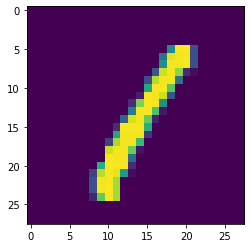

In [14]:
# view data
print(Y_train[3])
imshow(X_train[3,:].reshape(28,28))

In [15]:
# normalization
X_train,X_test=max_normalization(X_train,X_test)
Y_train.shape

(60000, 1)

In [16]:
#append train
X=np.ones([X_train.shape[0],1]) 
X_train=np.append(X,X_train,axis=1) #(m,n)
X_train.shape

(60000, 785)

In [17]:
#append test
X=np.ones([X_test.shape[0],1]) 
X_test=np.append(X,X_test,axis=1) #(m,n)


In [18]:
X_test.shape

(10000, 785)

In [19]:
Y_predicted_train,Y_predicted_test=model(0.1,X_train,Y_train,X_test,Y_test,iterations=2000)

cost after 50  iterations: 2.300610879615169
cost after 100  iterations: 2.2994533074949755
cost after 150  iterations: 2.2985694600077027
cost after 200  iterations: 2.297837877190446
cost after 250  iterations: 2.297206023350288
cost after 300  iterations: 2.296645159652078
cost after 350  iterations: 2.296137762610593
cost after 400  iterations: 2.29567235115804
cost after 450  iterations: 2.2952409827939397
cost after 500  iterations: 2.2948379208378507
cost after 550  iterations: 2.2944588741080736
cost after 600  iterations: 2.29410053842568
cost after 650  iterations: 2.2937603071639927
cost after 700  iterations: 2.2934360813499106
cost after 750  iterations: 2.2931261409255868
cost after 800  iterations: 2.2928290549612274
cost after 850  iterations: 2.2925436174549594
cost after 900  iterations: 2.292268800401521
cost after 950  iterations: 2.2920037187983544
cost after 1000  iterations: 2.2917476040830125
cost after 1050  iterations: 2.291499783642823
cost after 1100  iterat

In [41]:
Y_predicted_train=Y_predicted_train.T

In [42]:
test=confusion_matrix(Y_test,Y_predicted_test)


In [43]:
Y_train.shape

(60000, 1)

In [44]:
Y_predicted_train.shape

(60000, 1)

In [45]:
train=confusion_matrix(Y_train,Y_predicted_train)

In [48]:
train

array([[ 321,  691,  877,  696,  513,  883,  519,  277,  445,  701],
       [ 765, 1746,  200,  533,  181,  193,  622, 1145, 1168,  189],
       [ 966,  719,  335,  445,  411,  582,  483,  534,  941,  542],
       [ 366,  519,  468,  592,  652,  443,  805,  623, 1256,  407],
       [ 639,  722,  538,  698,  481,  677,  545,  723,  157,  662],
       [ 646,  618,  559,  641,  384,  409,  235,  615,  700,  614],
       [ 621,  866,  306, 1560,  416,  266,  310,  394,  666,  513],
       [ 459,  987, 1401,  291, 1076,  591,  547,  462,  233,  218],
       [ 353,  766,  441,  624,  644,  534,  833,  528,  541,  587],
       [ 454,  458,  397,  442,  556, 1172,  771,  586,  401,  712]],
      dtype=int64)

In [47]:
test

array([[ 980,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1032,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1010,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  982,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,  892,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,  958,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1028,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  974,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1009]],
      dtype=int64)

In [49]:
#accuracy ,recall ,precision
#for zero
TP=test[0,0]
FP=np.sum(test[0,1:],axis=0)
TN=np.sum(test[1:,1:])
FN=np.sum(test[1:,0])
accuracy=(TP+TN)/(TP+TN+FP+FN)
recall=(TP)/(TP+FN)
precision=(TP)/(TP+FP)

In [50]:
print("For zero:")
print("Accuracy: "+str(accuracy)+" Recall : "+str(recall)+" Precision: "+str(precision))

For zero:
Accuracy: 1.0 Recall : 1.0 Precision: 1.0
